In [11]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda




Solving environment: ...working... failed with current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Retina\.conda\envs\venv1

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36hfa6e2cd_1000         355 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         184 KB  conda-forge
    cffi-1.14.0                |   py36ha419a9e_0         221 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         220 KB  conda-forge
    cryptography-2.8           |   py36hb32ad35_1         564 KB  conda-forge
    folium-0.5.0               |    



==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda




Libraries imported.


# Wk1
Suitable New Store Locations in Paris for a Fashion Retailer¶
This notebook contains multiple parts:

A description of the problem and a discussion of the background - Week 1

A description of the data and how it will be used to solve the problem - Week 1

Methodology and Exploratory Data Analysis - Week 2

Inferences and Discussion - Week 2

In [13]:
paris = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv')
paris

,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


In [14]:
paris.rename(columns={'NAME': 'Neighborhood ', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
paris.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
paris

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325
5,16,Passy,16eme Ardt,48.860392,2.261971
6,11,Popincourt,11eme Ardt,48.859059,2.380058
7,2,Bourse,2eme Ardt,48.868279,2.342803
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777


# Wk2 data analysis
Data Analysis and Location Data
Visualization
Discussion and Conclusions

In [15]:
from geopy.geocoders import Nominatim 

address = 'Paris'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Paris France are 48.8566969, 2.3514616.


In [16]:
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

In [17]:
CLIENT_ID = 'EB4VB2E1RJVGEJGX3HWMVGSWRHSDBXCG253KCI1EROXXQZMI' # your Foursquare ID
CLIENT_SECRET = 'DEY1F3AMW3BVDA3EOWCHHCABIRHOCF2V34E3ZVVRILJKH2QN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EB4VB2E1RJVGEJGX3HWMVGSWRHSDBXCG253KCI1EROXXQZMI
CLIENT_SECRET:DEY1F3AMW3BVDA3EOWCHHCABIRHOCF2V34E3ZVVRILJKH2QN


In [18]:
paris.loc[0, 'French_Name']
paris.loc[0, 'French_Name']

neighborhood_latitude = paris.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = paris.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = paris.loc[0, 'French_Name'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood 3eme Ardt are 48.86287238, 2.3600009859999997.


In [19]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=EB4VB2E1RJVGEJGX3HWMVGSWRHSDBXCG253KCI1EROXXQZMI&client_secret=DEY1F3AMW3BVDA3EOWCHHCABIRHOCF2V34E3ZVVRILJKH2QN&v=20180605&ll=48.86287238,2.3600009859999997&radius=500&limit=100'

In [21]:
results = requests.get(url).json()

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

C:\Users\Retina\.conda\envs\venv1\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Mmmozza,Sandwich Place,48.863910,2.360591
1,Chez Alain Miam Miam,Sandwich Place,48.862369,2.361950
2,Square du Temple,Park,48.864475,2.360816
3,Marché des Enfants Rouges,Farmers Market,48.862806,2.361996
4,Chez Alain Miam Miam,Sandwich Place,48.862781,2.362064
5,Okomusu,Okonomiyaki Restaurant,48.861453,2.360879
6,Le Burger Fermier des Enfants Rouges,Burger Joint,48.862831,2.362073
7,Hôtel Jules & Jim,Hotel,48.863496,2.357395
8,SoMa,Japanese Restaurant,48.861511,2.362146
9,Les Enfants Rouges,Wine Bar,48.863013,2.361260


In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
paris_venues = getNearbyVenues(names=paris['French_Name'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )

3eme Ardt
19eme Ardt
14eme Ardt
10eme Ardt
12eme Ardt
16eme Ardt
11eme Ardt
2eme Ardt
4eme Ardt
17eme Ardt
18eme Ardt
1er Ardt
5eme Ardt
7eme Ardt
20eme Ardt
8eme Ardt
9eme Ardt
13eme Ardt
15eme Ardt
6eme Ardt


In [25]:
paris_venues.groupby('French_Name').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
French_Name,,,,,,
10eme Ardt,100,100,100,100,100,100
11eme Ardt,70,70,70,70,70,70
12eme Ardt,5,5,5,5,5,5
13eme Ardt,61,61,61,61,61,61
14eme Ardt,28,28,28,28,28,28
15eme Ardt,60,60,60,60,60,60
16eme Ardt,11,11,11,11,11,11
17eme Ardt,56,56,56,56,56,56
18eme Ardt,43,43,43,43,43,43


In [26]:
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 196 unique venue categories.


In [27]:
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1244,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,10eme Ardt,0.000000,0.02,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.010000,0.00,0.000000,0.000000,0.00,0.010000,0.020000,0.000000,0.0,0.0
1,11eme Ardt,0.014286,0.00,0.000000,0.00,0.000000,0.000000,0.014286,0.000000,0.014286,...,0.014286,0.00,0.014286,0.014286,0.00,0.042857,0.000000,0.014286,0.0,0.0
2,12eme Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.2,0.2
3,13eme Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.180328,...,0.000000,0.00,0.000000,0.213115,0.00,0.000000,0.000000,0.000000,0.0,0.0
4,14eme Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0
5,15eme Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.016667,0.016667,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.016667,0.016667,0.0,0.0
6,16eme Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.090909,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0
7,17eme Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.017857,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0
8,18eme Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.023256,0.00,0.023256,0.000000,0.000000,0.0,0.0
9,19eme Ardt,0.000000,0.00,0.022727,0.00,0.000000,0.000000,0.000000,0.000000,0.022727,...,0.000000,0.00,0.000000,0.022727,0.00,0.000000,0.022727,0.000000,0.0,0.0


In [29]:
num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10eme Ardt----
                 venue  freq
0    French Restaurant  0.13
1                Hotel  0.05
2          Coffee Shop  0.05
3    Indian Restaurant  0.04
4                 Café  0.04
5               Bistro  0.04
6  Japanese Restaurant  0.03
7          Pizza Place  0.03
8     Asian Restaurant  0.02
9    Korean Restaurant  0.02


----11eme Ardt----
                 venue  freq
0    French Restaurant  0.10
1                 Café  0.07
2          Supermarket  0.06
3             Wine Bar  0.04
4           Restaurant  0.04
5          Pastry Shop  0.04
6          Pizza Place  0.03
7  Japanese Restaurant  0.03
8               Bakery  0.03
9                  Bar  0.03


----12eme Ardt----
                      venue  freq
0               Zoo Exhibit   0.2
1  Bike Rental / Bike Share   0.2
2               Supermarket   0.2
3       Monument / Landmark   0.2
4                       Zoo   0.2
5                Playground   0.0
6              Optical Shop   0.0
7             Movie Theater  

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10eme Ardt,French Restaurant,Hotel,Coffee Shop,Bistro,Café,Indian Restaurant,Japanese Restaurant,Pizza Place,Bar,Breakfast Spot
1,11eme Ardt,French Restaurant,Café,Supermarket,Restaurant,Wine Bar,Pastry Shop,Italian Restaurant,Japanese Restaurant,Theater,Cocktail Bar
2,12eme Ardt,Zoo Exhibit,Bike Rental / Bike Share,Monument / Landmark,Supermarket,Zoo,Argentinian Restaurant,Dive Bar,African Restaurant,Fast Food Restaurant,Farmers Market
3,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,Chinese Restaurant,Thai Restaurant,French Restaurant,Juice Bar,Plaza,Paper / Office Supplies Store,Park,Coffee Shop
4,14eme Ardt,French Restaurant,Hotel,Bistro,Supermarket,Bakery,Café,EV Charging Station,Fast Food Restaurant,Brasserie,Convenience Store
5,15eme Ardt,Hotel,Italian Restaurant,French Restaurant,Coffee Shop,Japanese Restaurant,Indian Restaurant,Bakery,Thai Restaurant,Supermarket,Brasserie
6,16eme Ardt,Plaza,Park,Lake,Art Museum,Bus Station,French Restaurant,Boat or Ferry,Pool,Gym / Fitness Center,Gym
7,17eme Ardt,Hotel,French Restaurant,Italian Restaurant,Japanese Restaurant,Café,Bakery,Plaza,Bistro,Bike Rental / Bike Share,Laundromat
8,18eme Ardt,Bar,French Restaurant,Restaurant,Hotel,Convenience Store,Pizza Place,Coffee Shop,Cheese Shop,Supermarket,Bistro
9,19eme Ardt,Bar,French Restaurant,Supermarket,Hotel,Bistro,Café,Beer Bar,Seafood Restaurant,Bakery,Japanese Restaurant


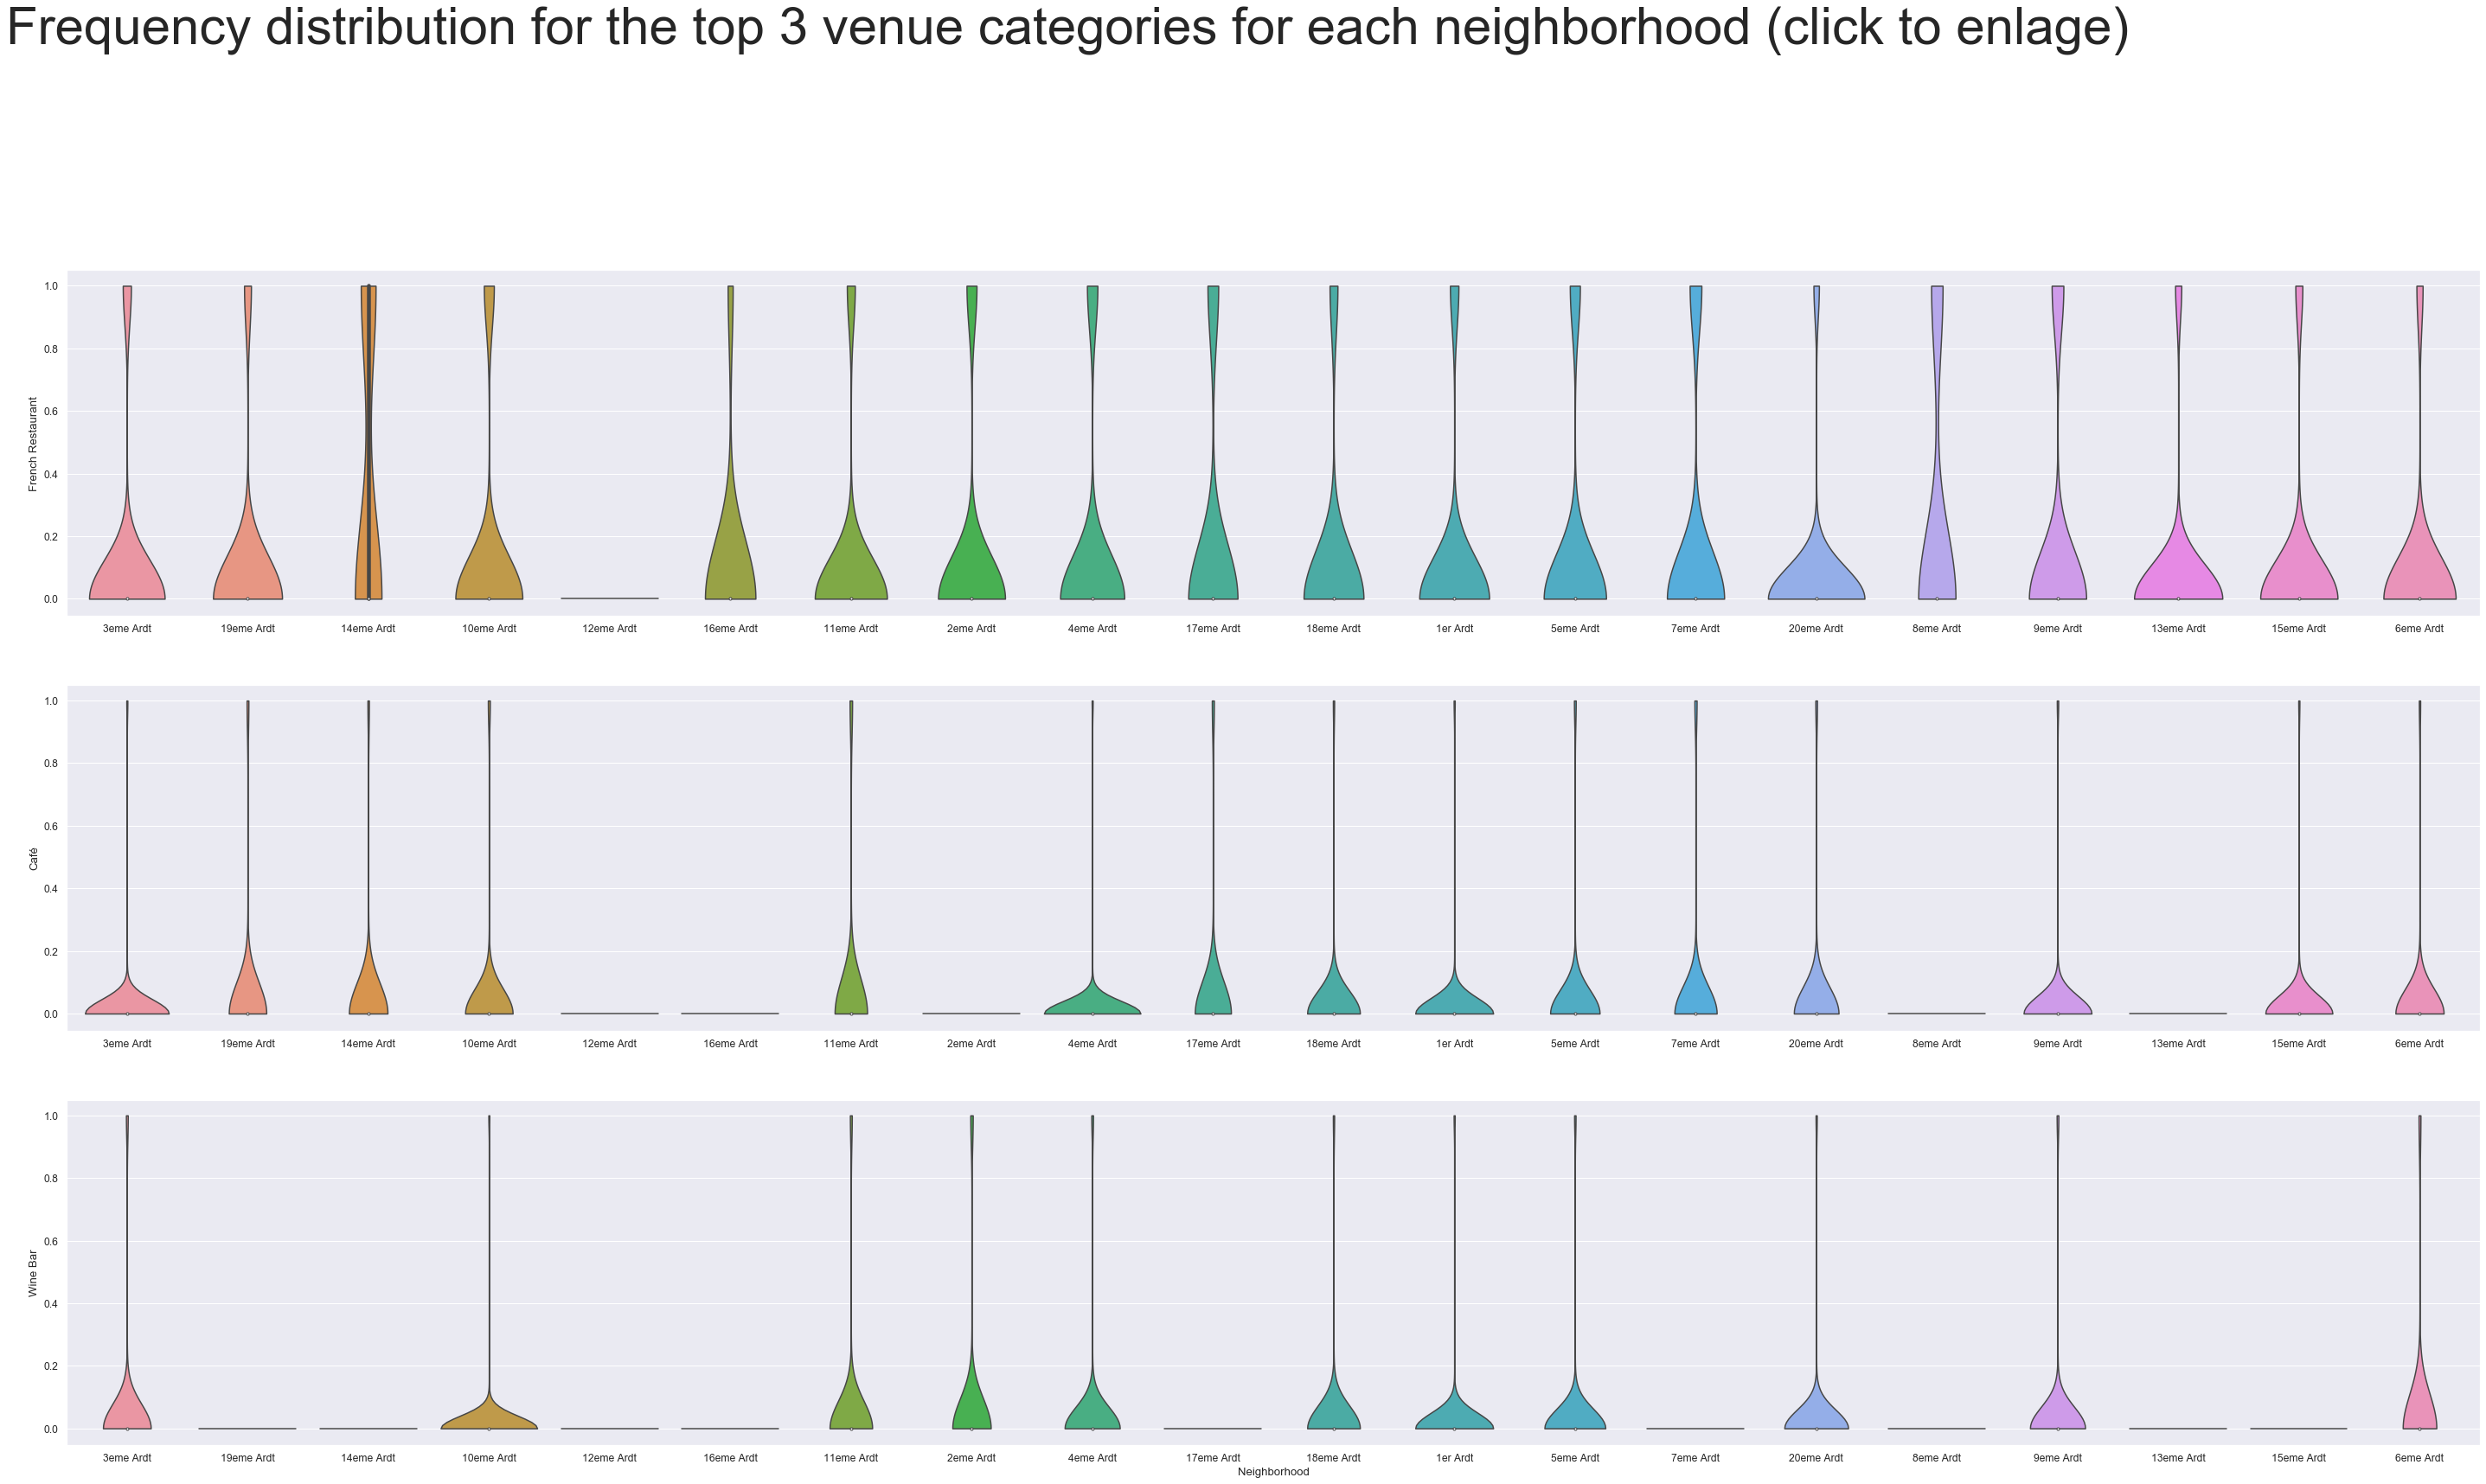

In [34]:

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

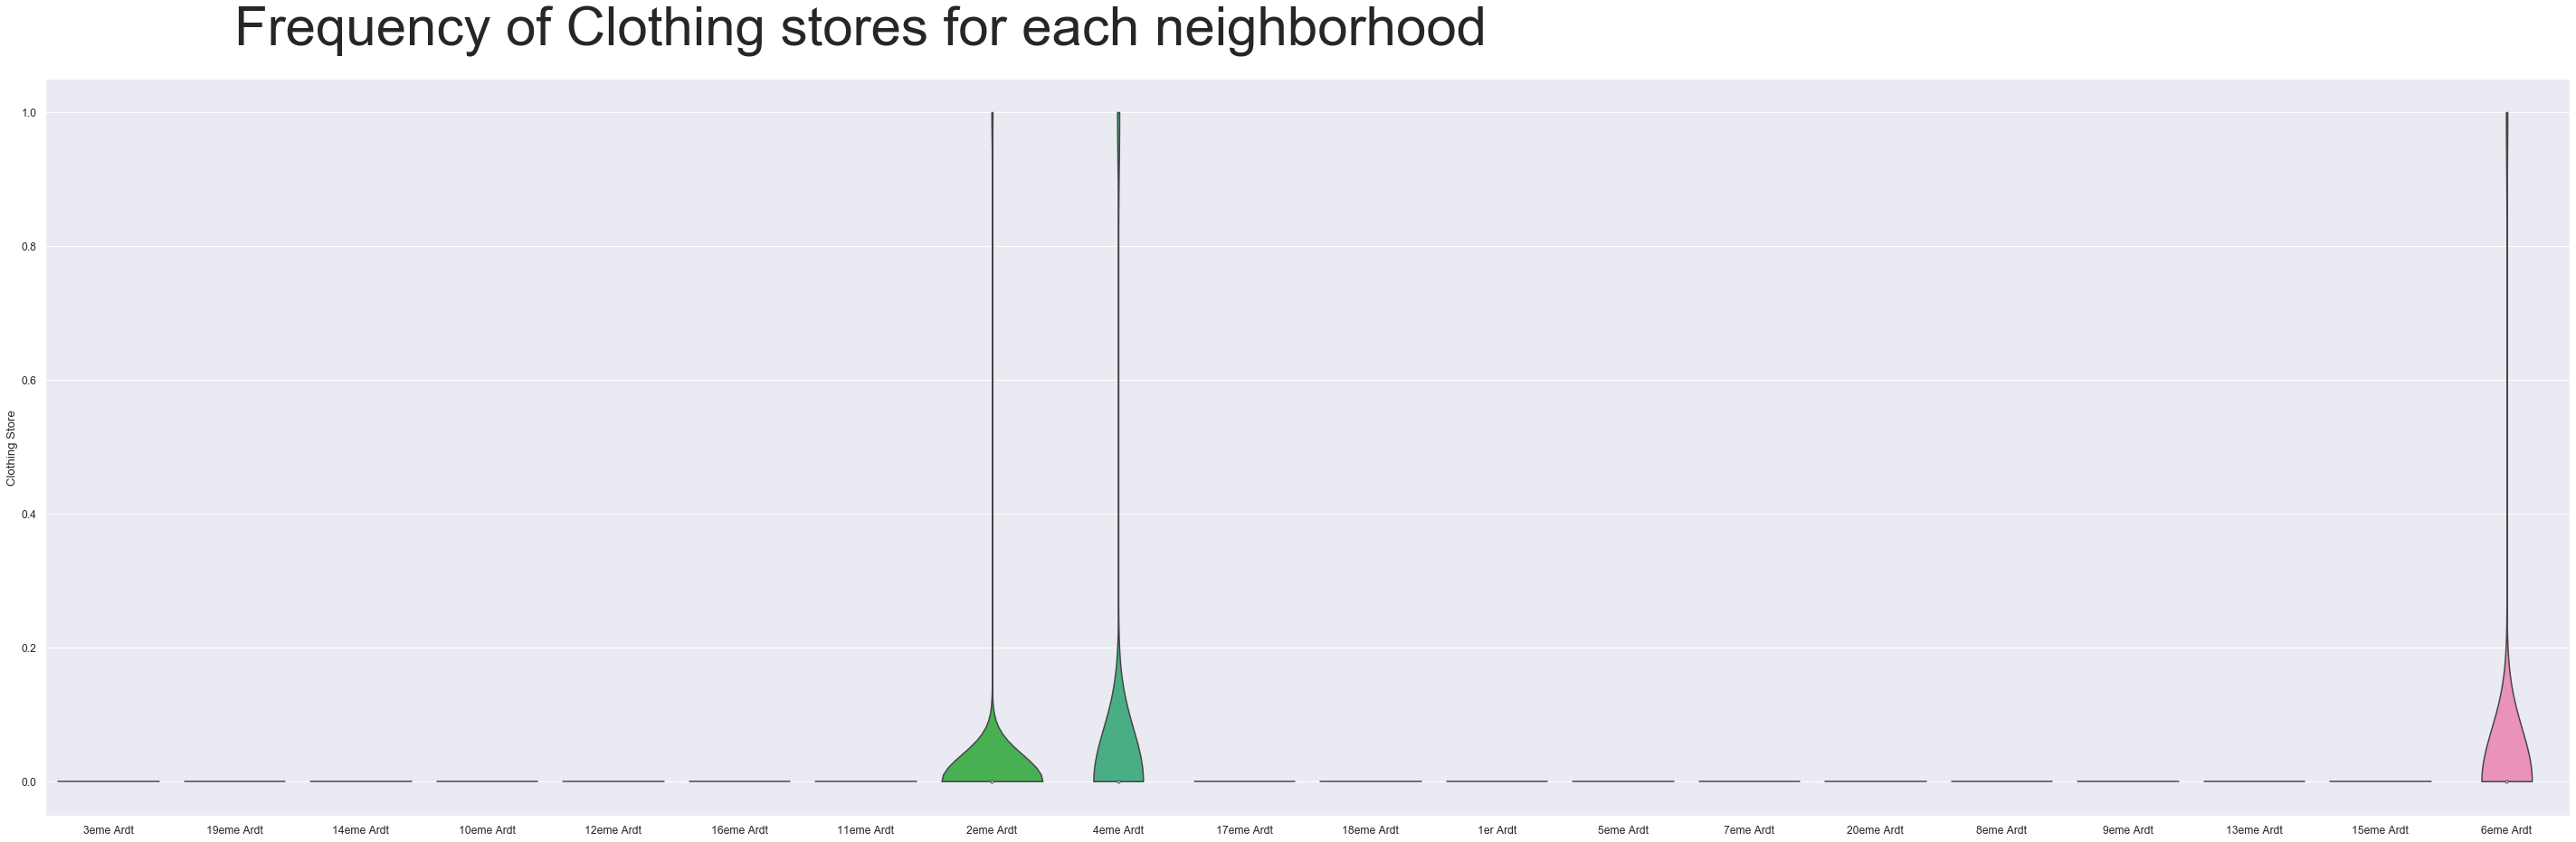

In [35]:
fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Clothing stores for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Clothing_Venues.png", dpi=240)
plt.show()

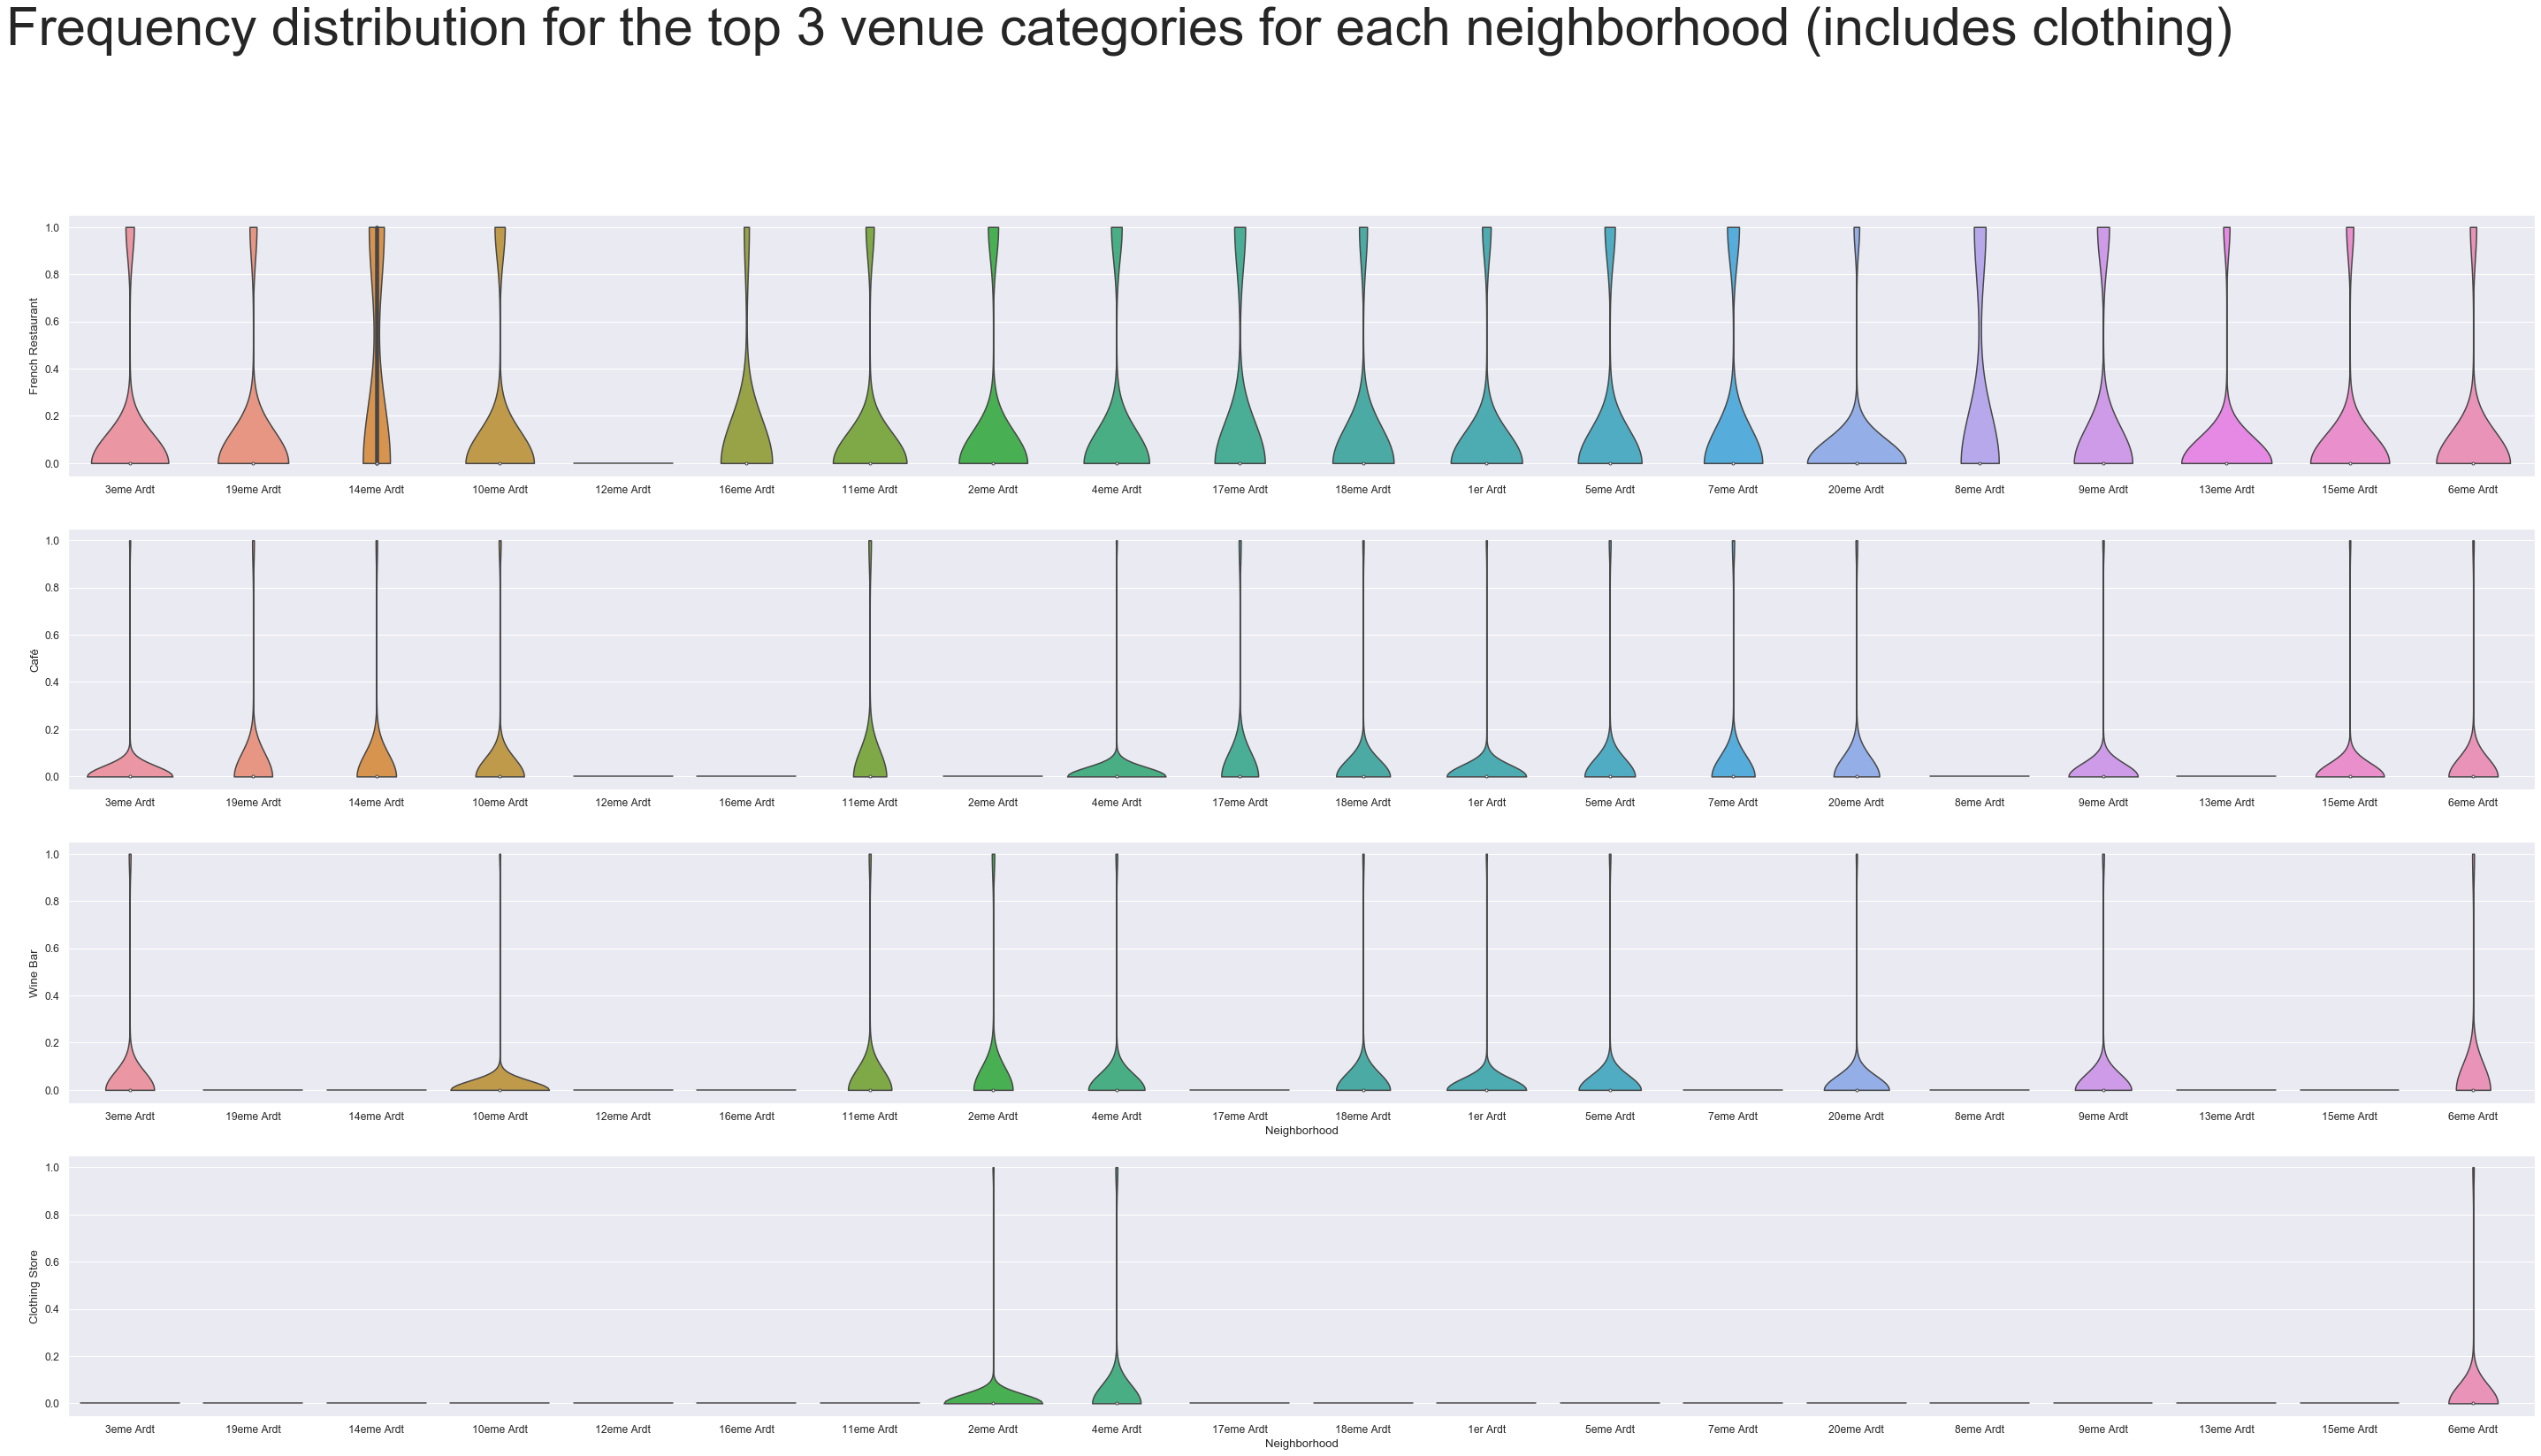

In [36]:
fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (includes clothing)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories_clothing.png", dpi=240)
plt.show()

In [37]:
chosen_districts = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Week%205/Chosen.csv')
chosen_districts

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
2,6,Luxembourg,6eme Ardt,48.849130,2.332898


In [38]:
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

In [39]:
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=130,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

I chose the method because it was a straight forward to narrow down the options. The analysis and results are not an end point, but rather a starting point that can be a  guide to the next part of the process to find specific store locations.

Thanks.